Define some filenames

In [1]:
import os
data_filename   = os.path.join(os.pardir, "data", "all_sz.json")
params_filename = os.path.join(os.pardir, "data", "default_params.json")

Load the subduction zone parameters

In [2]:
import json
with open(data_filename, "r") as fp:
    szparams = json.load(fp)

The "minimum" resolution, used to scale resolutions throughout the mesh.  The current default of 10.0km is way too high for a real subduction zone model but helps to keep this test notebook fast and readable.

In [3]:
minres = 1.0 # km

In [4]:
import numpy as np

Just for reference this is the code I used to generate the default parameters json file but it's turned off now and we just read it in in the next cell

Load the default parameters

In [5]:
with open(params_filename, "r") as fp:
    default_params = json.load(fp)

List the available subduction zones that we've just loaded from the json file

In [6]:
print("Available subduction zones:")
for k in szparams.keys(): print(k)

Available subduction zones:
01_Alaska_Peninsula
02_Alaska
03_British_Columbia
04_Cascadia
05_Mexico
06_GuatElSal
07_Nicaragua
08_Costa_Rica
09_Colombia_Ecuador
10_N_Peru_Gap
11_C_Peru_Gap
12_Peru
13_N_Chile
14_NC_Chile
15_C_Chile_Gap
16_C_Chile
17_SC_Chile
18_S_Chile
19_N_Antilles
20_S_Antilles
21_Scotia
22_Aegean
23_N_Sumatra
24_C_Sumatra
25_S_Sumatra
26_Sunda_Strait
27_Java
28_Bali_Lombok
29_W_Banda_Sea
30_E_Banda_Sea
31_New_Britain
32_Solomon
33_N_Vanuatu
34_S_Vanuatu
35_Tonga
36_Kermadec
37_New_Zealand
38_S_Philippines
39_N_Philippines
40_S_Marianas
41_N_Marianas
42_Bonin
43_Izu
44_Kyushu
45_Ryukyu
46_Nankai
47_C_Honshu
48_N_Honshu
49_Hokkaido
50_S_Kurile
51_N_Kurile
52_Kamchatka
53_W_Aleutians
54_C_Aleutians
55_E_Aleutians
56_Calabria


## This is where you can switch between subduction zones!!

Choose a subduction zone from the list on the first line of the following cell to load the geometrical parameters from the dictionary

In [7]:
szname = "07_Nicaragua"  # change this to switch subduction zones
szdata = szparams[szname]
coast_distance = szdata['deltaxcoast']
extra_width = szdata['deltaxwidth']
lc_depth = szdata['deltazmoho']
uc_depth = szdata['deltazuc']
io_depth = szdata['deltazoutflow']
points = np.asarray([szdata['trench']]+szdata['slabpoints'])
xs = points[:,0]
ys = points[:,1]
res = [1*minres if y > -200.0 else 3*minres for y in ys]

Load the geometry module so we can build a mesh based on the above parameters

In [8]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))
import geometry as geo

Define the slab spline

In [9]:
slab = geo.SlabSpline(xs, ys, res=res, sid=default_params['slab_sid'], name="Slab")

Define the subduction geometry, including crustal layers and plot

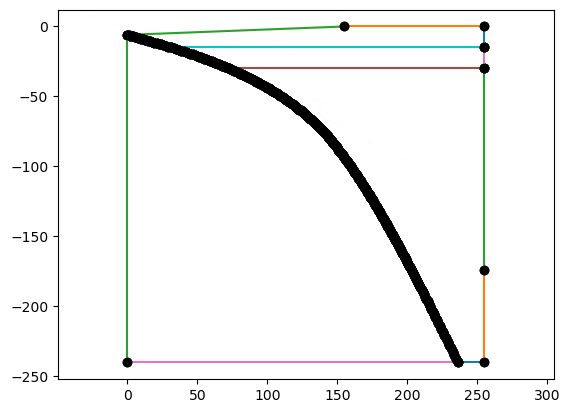

In [10]:
geom = geo.SubductionGeometry(slab, **default_params, 
                              wedge_top_res=default_params["wedge_top_res_fact"]*minres,
                              slab_base_res=default_params["slab_base_res_fact"]*minres,
                              coast_distance=coast_distance, extra_width=extra_width)
# adding the coupling depths may or may not be necessary
# depending on if they were included in the slab spline data already or not
# the geometry class should ignore them if they aren't necessary
slab.addpoint(80, "Slab::PartialCouplingDepth", res=1*minres)
slab.addpoint(82.5, "Slab::FullCouplingDepth", res=1*minres)
# add a lower crust
geom.addcrustlayer(lc_depth, "LowerCrust", 
                   sid=default_params["lc_base_sid"], rid=default_params["lc_rid"],
                   slab_res=default_params["lc_slab_res_fact"]*minres,
                   side_res=default_params["lc_side_res_fact"]*minres)
# oceanic subduction zones don't define an upper crust
if uc_depth is not None:
    geom.addcrustlayer(uc_depth, "UpperCrust", 
                       sid=default_params["uc_base_sid"], rid=default_params["uc_rid"],
                       slab_res=default_params["uc_slab_res_fact"]*minres,
                       side_res=default_params["uc_side_res_fact"]*minres)
# add the pre-defined in-out point
geom.addwedgesidepoint(io_depth, "WedgeSide::InOut", line_name="UpperWedgeSide", 
                       res=default_params["io_depth_res_fact"]*minres, 
                       sid=default_params["upper_wedge_side_sid"])
# add the slab detector point
geom.addslabpoint(default_params["slab_det_depth"], "Slab::DetectorPoint", res=1*minres)
geom.plot()

In [11]:
mesh, ct, ft = geom.generatemesh()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
I


No module named 'trame'

Falling back to a static output.
  warnings.warn(



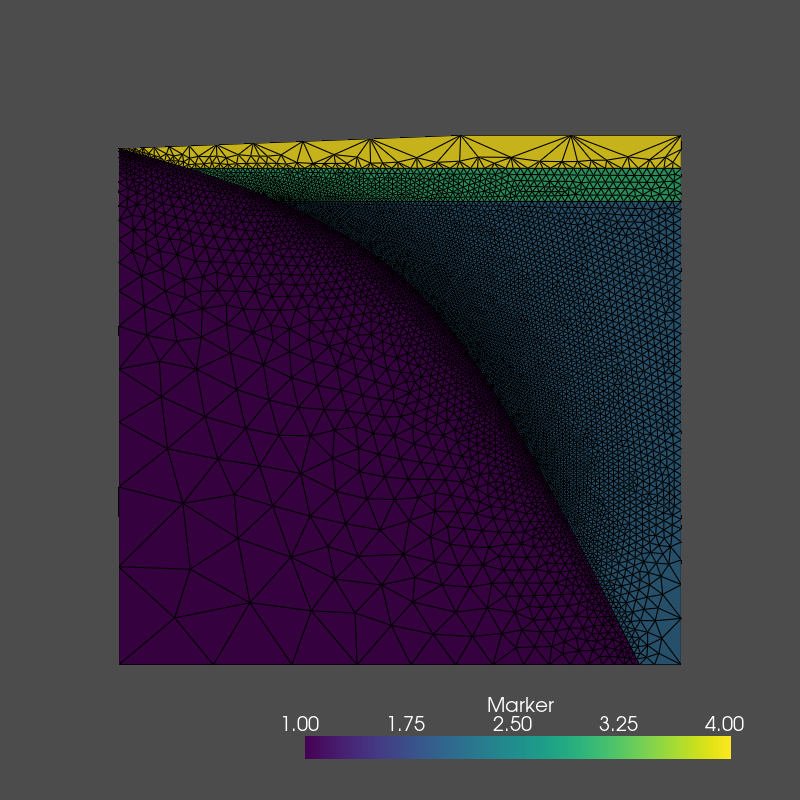

In [12]:
import pyvista
pyvista.start_xvfb()
from dolfinx.plot import create_vtk_mesh
topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
grid.set_active_scalars("Marker")

p = pyvista.Plotter(window_size=[800, 800])
p.add_mesh(grid, show_edges=True)
p.view_xy()
p.show()

In [13]:
import dolfinx
import numpy as np
import ufl
from dolfinx.fem import Function, FunctionSpace, dirichletbc, locate_dofs_geometrical, locate_dofs_topological, form

Ps2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Ps1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
Ve = FunctionSpace(mesh, Ps2)
Pe = FunctionSpace(mesh, Ps1)
THs = Ps2 * Ps1
Vs = FunctionSpace(mesh, THs)

(v_as, p_as) = ufl.TrialFunctions(Vs)
(v_ts, p_ts) = ufl.TestFunctions(Vs)

Vs0, _ = Vs.sub(0).collapse()
Vs00, _ = Vs0.sub(0).collapse()
Vs01, _ = Vs0.sub(1).collapse()
Vs1, _ = Vs.sub(1).collapse()

Pw2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Pw1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
Vwe = FunctionSpace(mesh, Pw2)
Pwe = FunctionSpace(mesh, Pw1)
THw = Pw2 * Pw1
Vw = FunctionSpace(mesh, THw)

(v_aw, p_aw) = ufl.TrialFunctions(Vw)
(v_tw, p_tw) = ufl.TestFunctions(Vw)

Vw0, _ = Vw.sub(0).collapse()
Vw00, _ = Vw0.sub(0).collapse()
Vw01, _ = Vw0.sub(1).collapse()
Vw1, _ = Vw.sub(1).collapse()


Vt = FunctionSpace(mesh, (ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)))
T_a = ufl.TrialFunction(Vt)
T_t = ufl.TestFunction(Vt)



In [14]:
ft.find(1)

array([ 7538,  7545,  7548,  7616,  7619,  7630,  7633,  7641,  7644,
        7645,  7660,  7663,  7664,  7667,  7670,  7673,  7676,  7822,
        7825,  7828,  7829,  7874,  7877,  7880,  7885,  7888,  7891,
        7892,  7895,  7896,  8146,  8149,  8157,  8160,  8163,  8164,
        8170,  8175,  8182,  8185,  8188,  8189,  8200,  8203,  8206,
        8227,  8230,  8231,  8424,  8427,  8436,  8439,  8440,  8445,
        8446,  8449,  8450,  8453,  8725,  8728,  8729,  8809,  9074,
        9077,  9321,  9322,  9325,  9337,  9340,  9602,  9612,  9613,
        9811,  9888,  9891, 10067, 10070, 10073, 10074, 10374, 10613,
       10616, 10617, 10929, 11166, 11167, 11467, 11706, 11707, 12027,
       12033, 12042, 12045, 12046, 12275, 12597, 12598, 12652, 12837,
       12866, 12869, 12876, 12879, 12880, 12886, 13171, 13213, 13216,
       13217, 13220, 13236, 13417, 13473, 13479, 13482, 13483, 13486,
       13495, 13745, 13746, 13791, 13793, 13794, 13825, 13828, 13829,
       13992, 14029,

In [15]:
slab_surface_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 1, np.concatenate((ft.find(1), ft.find(13))))


In [16]:
slab_surface_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 1, np.concatenate((ft.find(1), ft.find(13))))


In [17]:
All_except_slab_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [18]:
NonSlab_dofs_Vs0_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs0[0]) if dof not in slab_surface_dofs_Vs0[0]]
NonSlab_dofs_Vs0 = [All_except_slab_dofs_Vs0[i][NonSlab_dofs_Vs0_indices] for i in range(len(All_except_slab_dofs_Vs0))]

In [19]:
All_except_slab_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [20]:
NonSlab_dofs_Vs1_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs1[0]) if dof not in slab_surface_dofs_Vs1[0]]
NonSlab_dofs_Vs1 = [All_except_slab_dofs_Vs1[i][NonSlab_dofs_Vs1_indices] for i in range(len(All_except_slab_dofs_Vs1))]

In [21]:
slab_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(1))

In [22]:
slab_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(1))

In [23]:
upperWedge_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(9))

In [24]:
upperWedge_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(9))

In [25]:
All_except_wedge_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [26]:
NonWedge_dofs_Vw0_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw0[0]) if dof not in slab_surface_dofs_Vw0[0]]
NonWedge_dofs_Vw0 = [All_except_wedge_dofs_Vw0[i][NonWedge_dofs_Vw0_indices] for i in range(len(All_except_wedge_dofs_Vw0))]


In [27]:
All_except_wedge_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [28]:
NonWedge_dofs_Vw1_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw1[0]) if dof not in slab_surface_dofs_Vw1[0]]
NonWedge_dofs_Vw1 = [All_except_wedge_dofs_Vw1[i][NonWedge_dofs_Vw1_indices] for i in range(len(All_except_wedge_dofs_Vw1))]


In [29]:
NonWedgeTop_dofs_Vw1_indices = [i for i, dof in enumerate(NonWedge_dofs_Vw1[0]) if dof not in upperWedge_surface_dofs_Vw1[0]]
NonWedgeTop_dofs_Vw1 = [NonWedge_dofs_Vw1[i][NonWedgeTop_dofs_Vw1_indices] for i in range(len(NonWedge_dofs_Vw1))]


In [30]:
Backarc_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, np.concatenate((ft.find(4), ft.find(5), ft.find(6))))

In [31]:
top_surface_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(12))

In [32]:
Trench_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(2))

In [33]:
from petsc4py.PETSc import ScalarType
import scipy
zd = 97
Ts = 0
Tm = 1350
kc = 0.8064516
erf = scipy.special.erf
h0=1000
H1=0.419354
H2=0.087097
qs=2096774
z1=-15
z2=-40
kc=0.8064516
km=1
q1 = qs-(H1*z1)
q2=q1-H2*(z2-z1)
eta0=dolfinx.fem.Constant(mesh, ScalarType(10**21))
A_disl=28968
invA_disl=dolfinx.fem.Constant(mesh, ScalarType(1/A_disl))
E_o=dolfinx.fem.Constant(mesh, ScalarType(540000))
n=3.5
etamax=dolfinx.fem.Constant(mesh, ScalarType(10**25))
R=dolfinx.fem.Constant(mesh, ScalarType(8.3145))
T0=dolfinx.fem.Constant(mesh, ScalarType(1.0))
v0=dolfinx.fem.Constant(mesh, ScalarType(.023716014/365.25/24/60/60))
e0=dolfinx.fem.Constant(mesh, ScalarType(v0/h0))
nexp = (n-1.)/n


In [34]:
Ttop = Function(Vt)
Ttop.x.set(0.0)
bc_Ttop = dirichletbc(Ttop, top_surface_dofs_Vt)

In [35]:
def T_l(x):
    return Tm*erf(-x[1]/zd) 
Ttrench = Function(Vt)
Ttrench.interpolate(T_l)
bc_trench_Vt = dirichletbc(Ttrench, Trench_dofs_Vt)

In [36]:

def T_backarc(values):
    Tbackarc = np.empty(values.shape[1])
    for i in range(values.shape[1]):
        x = values[:,i]
        if -x[1] >= -15:
            Tbackarc[i] = Ts-(H1*(-x[1]**2)/(2*kc))+(-x[1]*(qs/kc))
        elif -40 < x[1] < -15:
             Tbackarc[i] = ((Ts-(H1*(z1**2)/(2*kc))+((qs/kc)*z1))-(H2*(-x[1]-z1)/2*kc)+(q1*(-x[1]-z1)))
        else:
             Tbackarc[i] = min(Tm,((Ts-(H1*(z2**2)/(2*kc))+((qs/kc)*z2))+q2*(-x[1]-z2)/km))
        #else:
            #TBackarc=Tm
        
    return Tbackarc
TBackarc = Function(Vt)
TBackarc.interpolate(T_l)


bc_backarc_Vt = dirichletbc(TBackarc, Backarc_dofs_Vt)

In [37]:
zero_vs = Function(Vs0)
zero_vs.x.set(0.0)
bc_NonSlab_Vs0 = dirichletbc(zero_vs, NonSlab_dofs_Vs0, Vs.sub(0))


In [38]:
zero_ps = Function(Vs1)
zero_ps.x.set(0.0)
bc_NonSlab_Vs1 = dirichletbc(zero_ps, NonSlab_dofs_Vs1, Vs.sub(1))


In [39]:
zero_v = Function(Vw0)
zero_v.x.set(0.0)
bc_WedgeTop = dirichletbc(zero_v, upperWedge_surface_dofs_Vw0, Vw.sub(0))


In [40]:
zero_vw = Function(Vw0)
zero_vw.x.set(0.0)
bc_NonWedge_Vw0 = dirichletbc(zero_vw, NonWedge_dofs_Vw0, Vw.sub(0))


In [41]:
zero_pw = Function(Vw1)
zero_pw.x.set(0.0)
bc_NonWedgeTop_Vw1 = dirichletbc(zero_pw, NonWedgeTop_dofs_Vw1, Vw.sub(1))


In [42]:

vo = 0.023716

def slab_velocity_s(values):
    return_values = np.empty((2,values.shape[1]))
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = 0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_s = Function(Vs0)
Vslab_s.interpolate(slab_velocity_s)
bc_slab_s = dirichletbc(Vslab_s, slab_surface_dofs_Vs0, Vs.sub(0))


In [43]:

def slab_velocity_w(values):
    return_values = np.empty((2,values.shape[1]))
    cd = 80.0
    vo = 0.023716
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = min(max(-(x[1]+cd)/2.5, 0.0), 1.0)*0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_w = Function(Vw0)
Vslab_w.interpolate(slab_velocity_w)
bc_slab_w = dirichletbc(Vslab_w, slab_surface_dofs_Vw0, Vw.sub(0))


In [44]:
ds = ufl.Measure('ds', domain=mesh, subdomain_data=ft)
dx = ufl.Measure("dx", domain=mesh, subdomain_data=ct)

In [45]:
from petsc4py.PETSc import ScalarType

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Ks = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*ufl.sym(ufl.grad(v_as)))*dx(1) + zero_c*ufl.inner(v_ts, v_as)*dx
Gs = -ufl.div(v_ts)*p_as*dx(1)
Ds = -p_ts*ufl.div(v_as)*dx(1)
Ss = Ks + Gs + Ds + zero_c*p_ts*p_as*dx

fs = zero_c * v_ts[0] * dx(1)
problem_vs = dolfinx.fem.petsc.LinearProblem(Ss, fs, bcs=[bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
us_i = problem_vs.solve()
vs_i=us_i.sub(0)


In [46]:
from dolfinx import io
vs = us_i.sub(0).collapse()
#v = Vslab_s
vs.name = "Velocity"
ps = us_i.sub(1).collapse()
ps.name = "Pressure"

with io.VTKFile(mesh.comm, "output_v.pvd", "w") as vtk:
    vtk.write_function([vs], 0.0)
with io.VTKFile(mesh.comm, "output_p.pvd", "w") as vtk:
    vtk.write_function([ps], 0.0)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



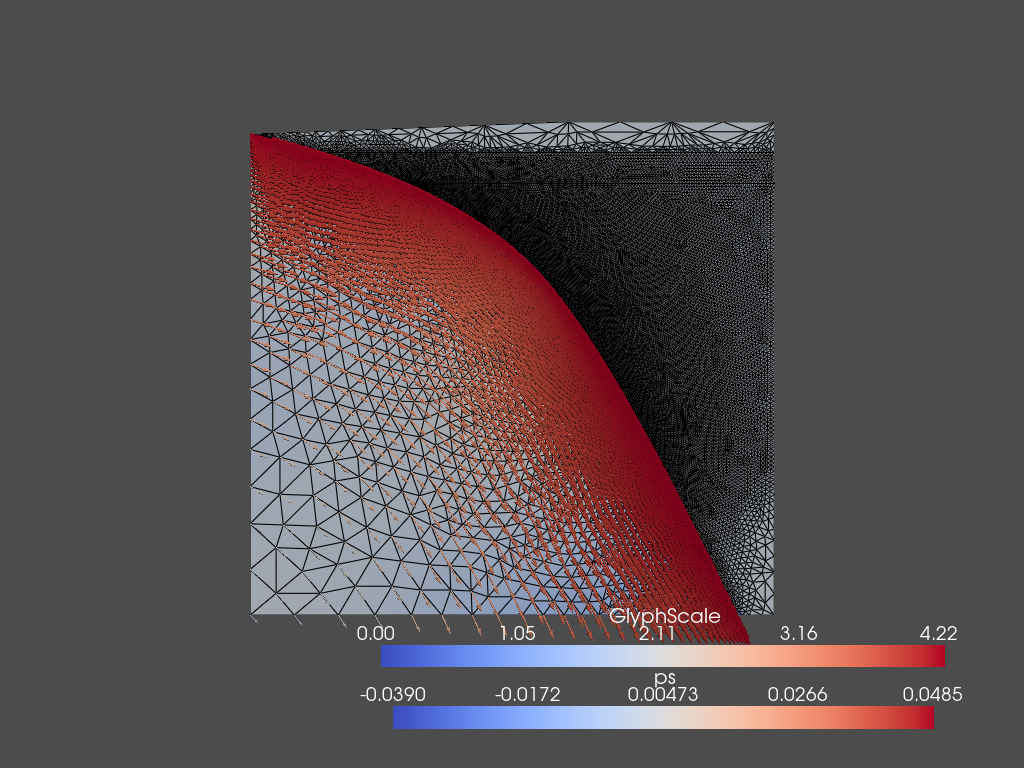

In [47]:
import pyvista
from dolfinx.plot import create_vtk_mesh
import matplotlib.pyplot as plt

pyvista.start_xvfb()
topologys, cell_types_s, geometrys = create_vtk_mesh(Vs0)
values_s = np.zeros((geometrys.shape[0], 3), dtype=np.float64)
values_s[:, :len(vs)] = vs.x.array.real.reshape((geometrys.shape[0], len(vs)))

# Create a point cloud of glyphs
function_grids = pyvista.UnstructuredGrid(topologys, cell_types_s, geometrys)
function_grids["vs"] = values_s
glyphs_s = function_grids.glyph(orient="vs", factor=4)

# create a scalar field on the P2 element
p_p2s = Function(Vs00)
# and interpolate the pressure onto it
p_p2s.interpolate(ps)
# then put that pressure onto the function_grid
function_grids["ps"] = p_p2s.x.array.real
function_grids.set_active_scalars("ps")

# Create plotter
plotter = pyvista.Plotter()
plotter.add_mesh(function_grids, show_edges=True, cmap='coolwarm')
plotter.add_mesh(glyphs_s, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    plotter.savefig('Vel_Pressurefield2.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [48]:
zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Kw = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*ufl.sym(ufl.grad(v_aw)))*dx(2) + zero_c*ufl.inner(v_tw, v_aw)*dx
Gw = -ufl.div(v_tw)*p_aw*dx(2)
Dw = -p_tw*ufl.div(v_aw)*dx(2)
Sw = Kw + Gw + Dw + zero_c*p_tw*p_aw*dx

Sw = ufl.inner(v_tw, v_aw)*dx + p_tw*p_aw*dx
fw = (v_tw[0] + v_tw[1] + p_tw) * dx(2)
problem_vw = dolfinx.fem.petsc.LinearProblem(Sw, fw, bcs=[bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
uw_i = problem_vw.solve()
vw_i=uw_i.sub(0)

In [49]:
vw_i.x.array


array([1., 1., 1., ..., 0., 0., 0.])

In [50]:
from dolfinx import io
vw = uw_i.sub(0).collapse()
#vw = Vslab_w
vw.name = "Velocityw"
pw = uw_i.sub(1).collapse()
pw.name = "Pressurew"

with io.VTKFile(mesh.comm, "output_vw.pvd", "w") as vtk:
    vtk.write_function([vw], 0.0)
with io.VTKFile(mesh.comm, "output_pw.pvd", "w") as vtk:
    vtk.write_function([pw], 0.0)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



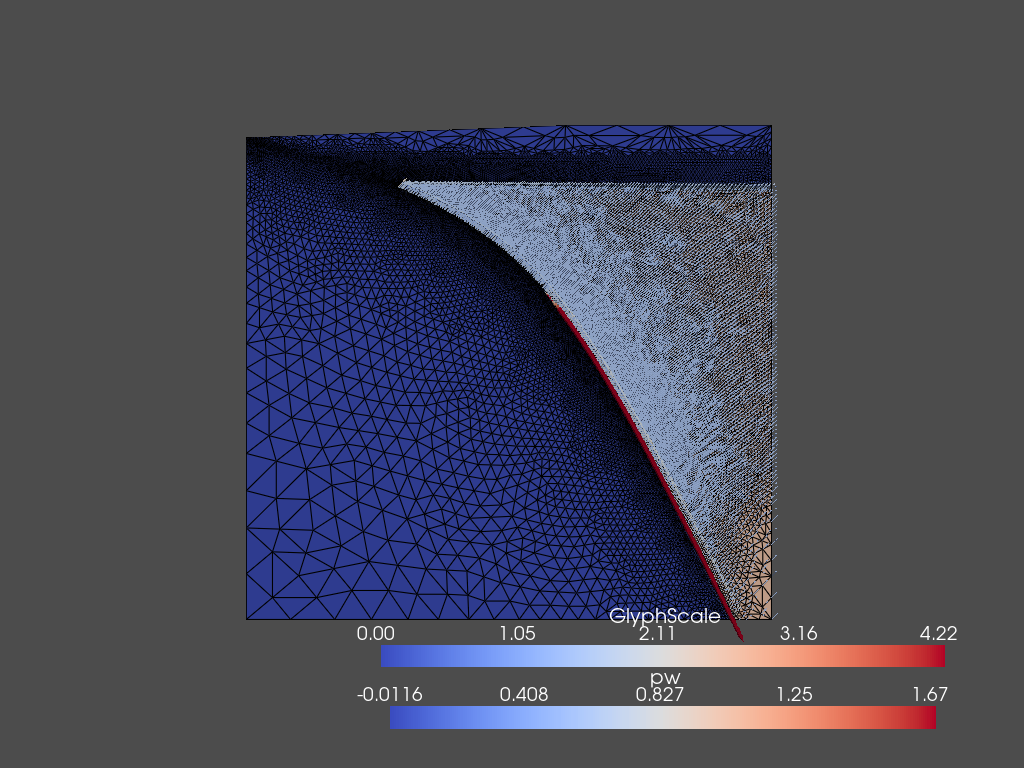

In [51]:
import pyvista
from dolfinx.plot import create_vtk_mesh
import matplotlib.pyplot as plt

pyvista.start_xvfb()
topologyw, cell_typesw, geometryw = create_vtk_mesh(Vw0)
valuesw = np.zeros((geometryw.shape[0], 3), dtype=np.float64)
valuesw[:, :len(vw)] = vw.x.array.real.reshape((geometryw.shape[0], len(vw)))

# Create a point cloud of glyphs
function_gridw = pyvista.UnstructuredGrid(topologyw, cell_typesw, geometryw)
function_gridw["vw"] = valuesw
glyphsw = function_gridw.glyph(orient="vw", factor=3)

# create a scalar field on the P2 element
pw
p_p2w = Function(Vw00)
# and interpolate the pressure onto it
p_p2w.interpolate(pw)
# then put that pressure onto the function_grid
function_gridw["pw"] = p_p2w.x.array.real
function_gridw.set_active_scalars("pw")

# Create plotter
plotter = pyvista.Plotter()
plotter.add_mesh(function_gridw, show_edges=True, cmap='coolwarm')
plotter.add_mesh(glyphsw, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    plotter.savefig('Vel_Pressurefield2.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [53]:
from ufl import dot,inner,grad,sym

S1 =  (T_t*dot(vs_i, grad(T_a))+inner(grad(T_a), grad(T_t)))*dx(1)
S2 =  (T_t*dot(vw_i, grad(T_a))+inner(grad(T_a), grad(T_t)))*dx(2)
S3 =  (inner(grad(T_a), grad(T_t)))*dx(3)
S4 =  (inner(grad(T_a), grad(T_t)))*dx(4)
St=S1+S2+S3+S4
ft = T_t*H1*dx(4) + T_t*H2*dx(3)

problem_T = dolfinx.fem.petsc.LinearProblem(St, ft, bcs=[bc_Ttop, bc_trench_Vt, bc_backarc_Vt], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
T_i = problem_T.solve()

  clim = [np.nanmin(scalars), np.nanmax(scalars)]


No module named 'trame'

Falling back to a static output.
  warnings.warn(



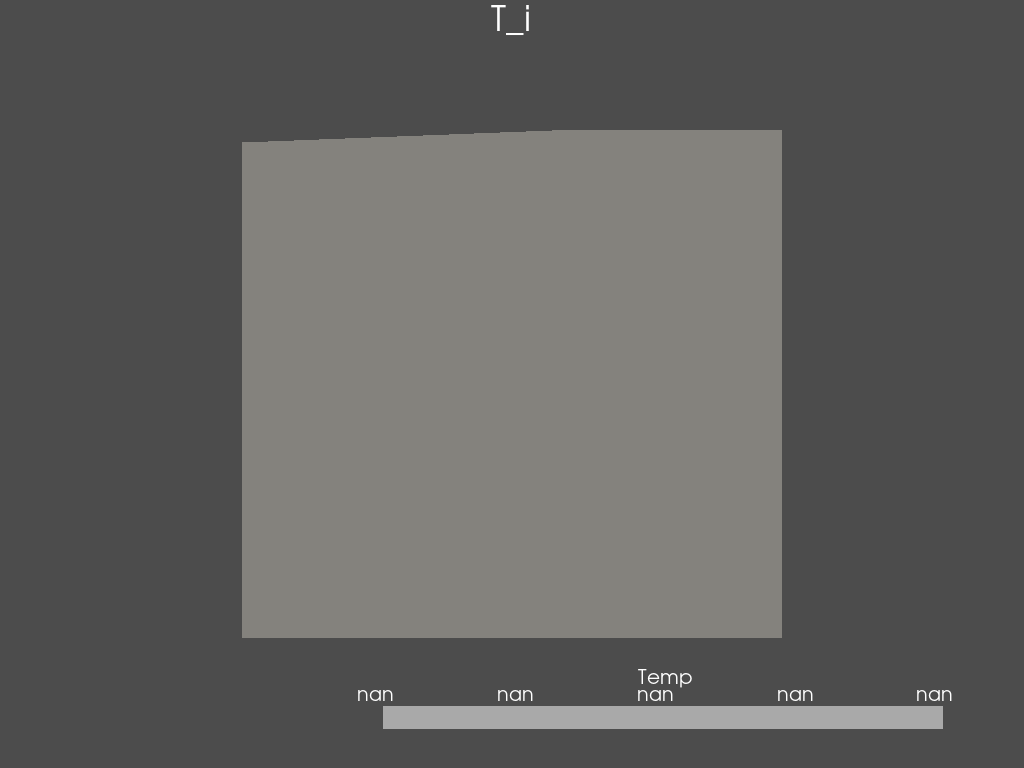

In [54]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
pyvista_cells, cell_types, geometry = create_vtk_mesh(T_i.function_space)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temp"] = T_i.x.array
grid.set_active_scalars("Temp")

plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm')
plotter.view_xy()

if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("Temp.pdf")


No module named 'trame'

Falling back to a static output.
  warnings.warn(



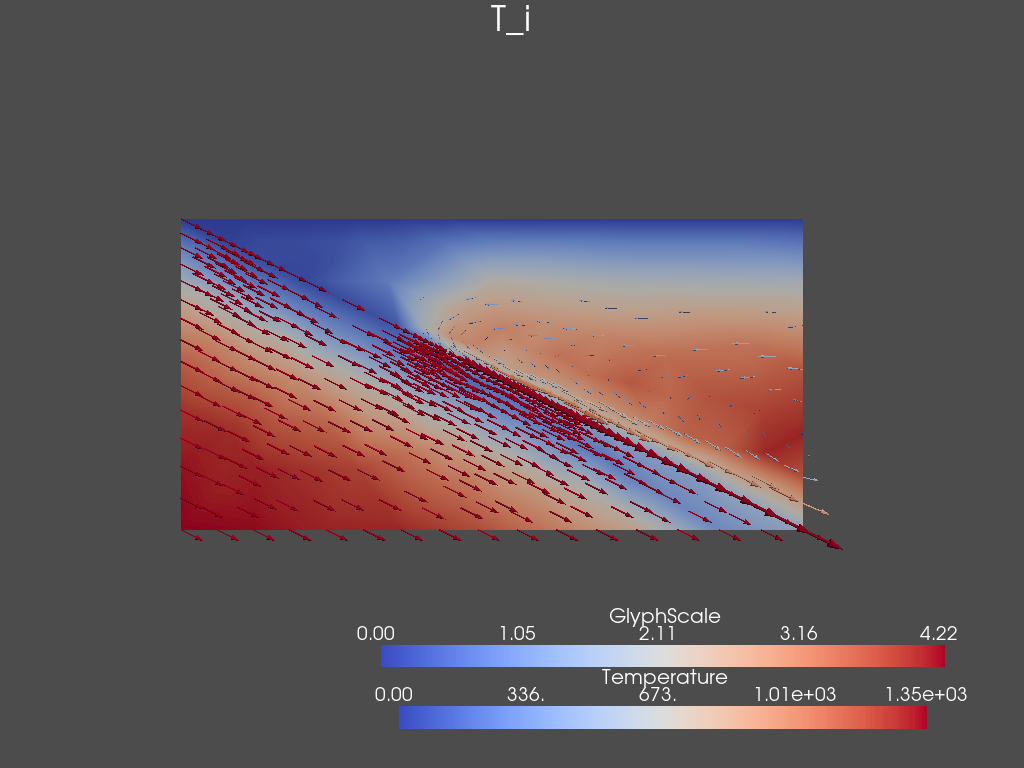

In [67]:
import pyvista
from dolfinx.plot import create_vtk_mesh


glyphs = glyphs_s+glyphsw

pyvista_cells, cell_types, geometry = create_vtk_mesh(Vt)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temperature"] = T_i.x.array
grid.set_active_scalars("Temperature")
plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm')

plotter.add_mesh(glyphs, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
     plotter.show()
else:
    glyphs = plotter.screenshot('glyphs.pdf', format='pdf')